My attempt to implment logictic regression from scracth. data is from master machine learnng algorithms. 

In [ ]:
data =[
[2.7810836, 2.550537003, 0],
[1.465489372, 2.362125076, 0],
[3.396561688, 4.400293529, 0],
[1.38807019, 1.850220317,0],
[3.06407232, 3.005305973, 0],
[7.627531214, 2.759262235, 1],
[5.332441248, 2.088626775, 1],
[6.922596716, 1.77106367, 1],
[8.675418651, -0.242068655, 1],
[7.673756466, 3.508563011, 1]]

In [ ]:
from gradient_descent_ols import Vector, add, plot_loss
from Multivariate_linear_regression import chunks, vector_mean, scalar_multiply, predict_point,add_intercept_vectors
import math
import random
from typing import List

In [ ]:
def logit(z: float) -> float:
    return 1 / (1 + math.exp(-z))

assert 0 < logit(-5.4) < 0.01

In [ ]:
def predict_point_logit(x: Vector, theta: Vector) -> float:
    return logit(predict_point(x, theta))

def error_point(x: Vector, y: float, theta: Vector) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point_logit(x, theta) - y
    
def gradient(x: List[Vector], y: float, theta: Vector) -> List:
    """Calculates the gradient update for 1 point for theta """
    return scalar_multiply(error_point(x, y, theta), x)

def evaluate_gradient(data: List[List[Vector]], theta: Vector) -> float:
    """evaluates gradient for provided data structure 
    [[x_0, x_1,.., x_i],[x_0, x_1,.., x_i]] -> [y_1,y_2]"""
    return vector_mean([gradient(x, y, theta) for x, y in data]) 
    
def gradient_step(gradient: Vector, alpha: float) -> Vector:
    """ takes one gradient step"""
    return scalar_multiply(alpha, gradient)

def theta_update(theta: Vector, gradient: Vector , alpha: float) -> Vector:
    return add(theta, gradient_step(gradient, -alpha))

In [ ]:
def _point_loss_function_logistic(y_hat:float, y: float) -> float:
    """for one point calculate the loss"""
    return y * math.log(y_hat) + (1 - y) * (math.log(1 - y_hat))

def loss_function_logistic(y_hats: Vector, ys: Vector) -> float:
    """for a pair of y_hat and y vectors calculate  the loss value"""
    assert len(y_hats) == len(ys)
    m = len(y_hats)
    return (-1/ m ) * sum( _point_loss_function_logistic(y_hat, y)
                         for y_hat, y in zip(y_hats, ys))

In [ ]:
xs = [vector[:-1] for vector in data]
ys = [vector[-1] for vector in data]

In [ ]:
data_copy = [[x, y] for x, y in zip(add_intercept_vectors(xs), ys)]
data_copy
chunk = list(chunks(data_copy, 2))[-1]
chunk

In [ ]:
grad = evaluate_gradient(chunk, [0.4, 0.1, 1])
grad


In [ ]:
def negative_log_fit(xs: List[float] , ys: List[float], 
                       alpha: float,  epochs: int = 1000, 
                       batch_size: int = 10) -> Vector:
    """
    Find the theta that minimizes the loss function
    """      
    n = len(xs[0])                              # number of features
    theta = [random.random() for _ in range(n)] # initial random guess for theta
                                                # number trainning examples
    loss = []                                   # to plot the avg. loss per epoch
    
    data = [[x, y] for x, y in zip(xs, ys)]     # zip data structure 
    for epoch in range(epochs):
        chunks_loss = []                                # for avg. loss
        for chunk in chunks(data, batch_size):
            grad = evaluate_gradient(chunk, theta)               # evaluate the gradient    
            theta = theta_update(theta, grad, alpha)             # update theta 
            y_hats = [predict_point_logit(x, theta) for x in xs]
            loss_per_chunk = loss_function_logistic(y_hats, ys)  # loss per chunk iter
            chunks_loss.append(loss_per_chunk)                          
        average_epoch_loss = sum(chunks_loss) / len(chunks_loss)       
        loss.append((epoch, average_epoch_loss))                # plot the avg per epoch
    plot_loss(loss)
    return theta

In [ ]:
theta  = negative_log_fit(add_intercept_vectors(xs), ys, 0.1, 1000, 5)

In [ ]:
y_hats = [predict_point_logit(x, theta) for x in add_intercept_vectors(xs)]
[(yhat, y) for yhat, y in zip(y_hats, ys)]

In [ ]:
from log_regression_data import rescaled_xs, ys

In [ ]:
rescaled_xs[:2]

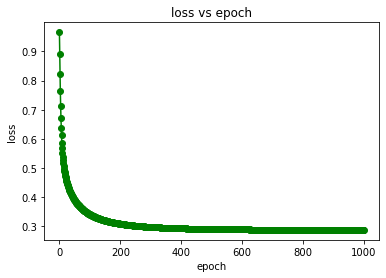

In [48]:
theta  = negative_log_fit(rescaled_xs, ys, 0.01, 1000, 5)

In [49]:
theta

[-2.032232502036101, 4.307704039212852, -4.183437504391885]